In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #...
import math
myplate=sns.color_palette("Paired")
sns.set(style='white', palette=myplate)

import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
def bar_colorizer(n,*h1):
    colors=[]
    for i in range(n):
        if i+1 not in h1:
            colors.append('#ADD8E6')
        else:
            colors.append('#0D2241')
    return colors

clrs = ["#ADD8E6","#FF0000"]
mypalette = sns.set_palette(sns.color_palette(clrs))

print('^^Importing Important Stuff^^')

/kaggle/input/spotify-top-10000-streamed-songs/Spotify_final_dataset.csv
^^Importing Important Stuff^^


In [2]:
spot_path = "/kaggle/input/spotify-top-10000-streamed-songs/Spotify_final_dataset.csv"
spot = pd.read_csv(spot_path, index_col = 'Position')
spot.head()

,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
Position,,,,,,,,
1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


In [3]:
spot.columns = spot.columns.str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
spot.peak_position_xtimes = spot.peak_position_xtimes.str.replace('(','').str.replace(')','').str.replace('x','')
spot.peak_position_xtimes = spot.peak_position_xtimes.astype(int)

In [4]:
spot.loc[spot['song_name'].isnull(), 'song_name'] = spot.loc[spot['song_name'].isnull(), 'artist_name'] + '\'s song'

In [5]:
cate = []
nume = []
for column in spot.columns:
    if spot[column].dtypes == 'object':
        cate.append(column)
    else:
        nume.append(column)

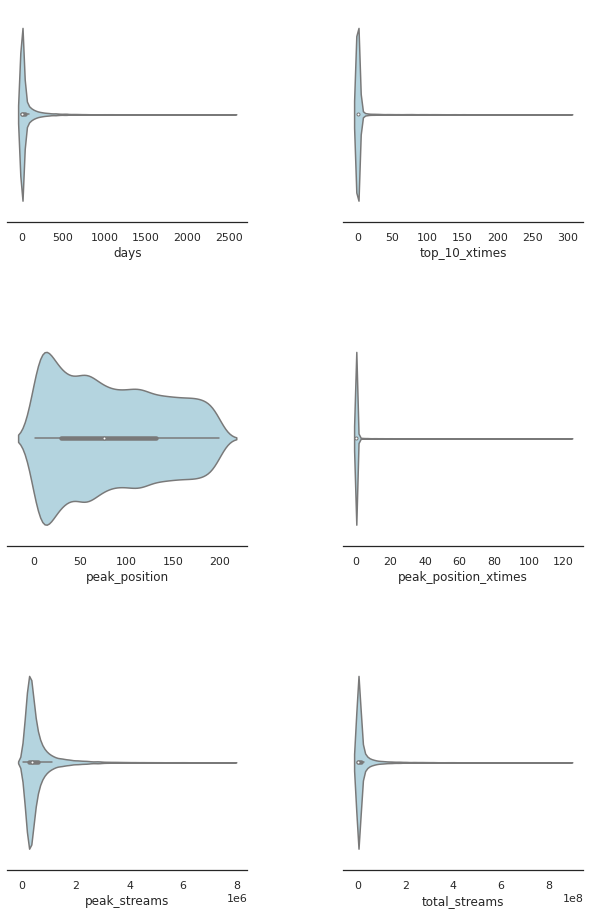

In [6]:
m=math.ceil(math.sqrt(len(nume)))
n=math.ceil(len(nume)/m)


fig, axes = plt.subplots(m,n,figsize=(10,15))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
sns.despine(left=True)
for i in range(m):
    for j in range(n):
        sns.violinplot(ax=axes[i,j], data=spot, x=nume[i*n+j])
        
        if i*n+j==len(nume)-1:
            break

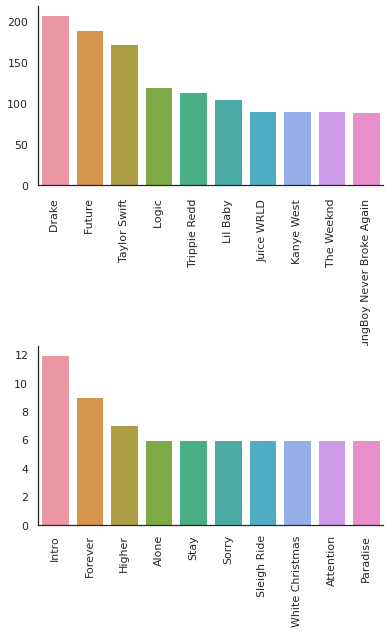

In [7]:
m=math.ceil(math.sqrt(len(cate)))
n=math.ceil(len(cate)/m)
fig, axes = plt.subplots(m,n,figsize=(6,9))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)

sns.despine()
for i in range(m):
    for j in range(n):
        sns.barplot(x= spot[cate[i*n+j]].value_counts()[:10].index,
                    y= spot[cate[i*n+j]].value_counts()[:10].values,
                   ax=axes[i])
        axes[i].tick_params(axis='x', labelrotation=90)
        
        if i*n+j==len(cate)-1:
            break

In [8]:
spot['top'] = spot.peak_position == 1
spot['streams_per_day'] = spot['total_streams']/spot['days']
spot.describe()

,days,top_10_xtimes,peak_position,peak_position_xtimes,peak_streams,total_streams,streams_per_day
count,11084.000000,11084.000000,11084.000000,11084.000000,1.108400e+04,1.108400e+04,1.108400e+04
mean,53.366925,2.713641,83.070101,0.386954,5.529469e+05,1.830891e+07,2.873194e+05
std,129.750902,15.604130,58.932049,3.604104,6.282936e+05,5.219383e+07,1.374935e+05
min,1.000000,0.000000,1.000000,0.000000,4.432300e+04,4.432300e+04,4.432300e+04
25%,2.000000,0.000000,29.000000,0.000000,2.431595e+05,3.824272e+05,2.143595e+05
50%,7.000000,0.000000,75.000000,0.000000,3.505885e+05,1.704876e+06,2.770415e+05
75%,39.000000,0.000000,132.000000,0.000000,5.963382e+05,1.078333e+07,3.481275e+05
max,2547.000000,302.000000,200.000000,124.000000,7.786096e+06,8.833697e+08,2.494240e+06


<AxesSubplot:>

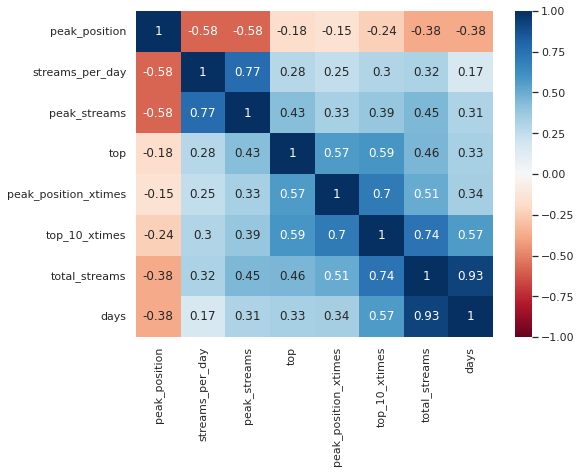

In [9]:
plt.figure(figsize= (8,6))
sns.heatmap(spot.corr().sort_values(by = 'days', axis = 0).sort_values(by = 'days', axis = 1),vmin = -1, cmap = 'RdBu', annot = True)

<AxesSubplot:xlabel='days', ylabel='streams_per_day'>

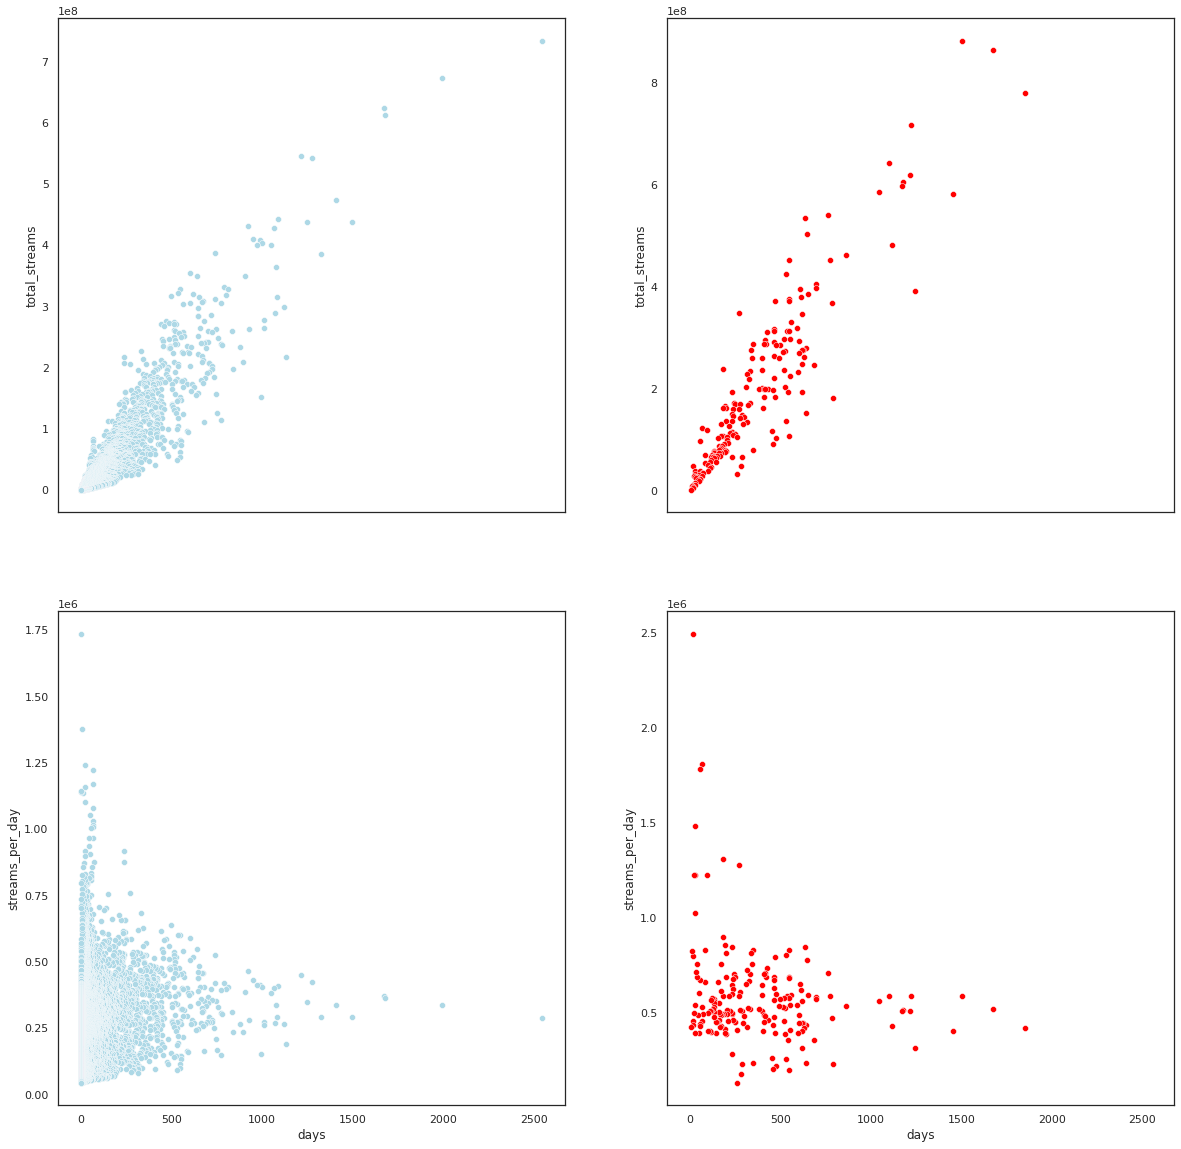

In [10]:
fig, axes = plt.subplots(2,2, figsize = (20, 20),sharex = True)
sns.scatterplot(x= 'days', y = 'total_streams', data = spot[~spot.top], ax = axes [0,0])
sns.scatterplot(x= 'days', y = 'total_streams', data = spot[spot.top], ax = axes [0,1], color ='#FF0000')
sns.scatterplot(x= 'days', y = 'streams_per_day', data = spot[~spot.top], ax = axes [1,0])
sns.scatterplot(x= 'days', y = 'streams_per_day', data = spot[spot.top], ax = axes [1,1], color = '#FF0000')

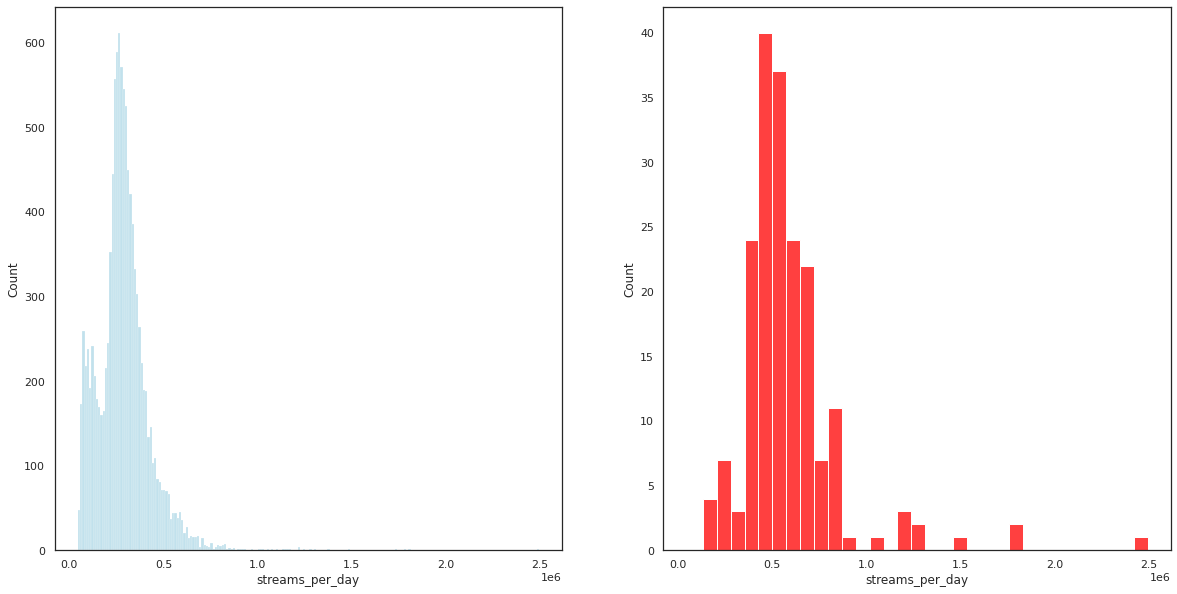

In [11]:
fig, axes = plt.subplots(1,2, figsize = (20, 10),sharex = True)
x = sns.histplot(data = spot[spot.top], x = 'streams_per_day', ax = axes[1], color = "#FF0000")
y = sns.histplot(data = spot, x = 'streams_per_day', ax = axes [0])

<AxesSubplot:xlabel='streams_per_day', ylabel='peak_streams'>

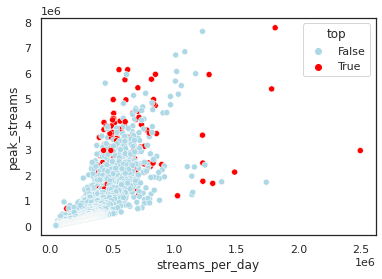

In [12]:
x= [False, True]
sns.scatterplot(x= 'streams_per_day', y = 'peak_streams', data = spot, hue = 'top', hue_order=x, sizes = 'Large')

In [13]:
spot.loc[1:20]

,artist_name,song_name,days,top_10_xtimes,peak_position,peak_position_xtimes,peak_streams,total_streams,top,streams_per_day
Position,,,,,,,,,,
1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738,True,586566.891102
2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399,True,516935.086073
3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024,True,421561.264976
4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487,False,288518.840597
5,Post Malone,rockstar,1223,186.0,1,124,2905678,718865961,True,587789.011447
6,Travis Scott,goosebumps,1995,4.0,8,0,977275,672972704,False,337329.676190
7,The Weeknd,Blinding Lights,1100,233.0,1,11,2355059,644287953,True,585716.320909
8,XXXTENTACION,Jocelyn Flores,1673,44.0,2,1,3175206,624457164,False,373255.925882
9,XXXTENTACION,SAD!,1217,133.0,1,6,4437612,619879245,True,509350.242399
